# Plotting with Matplotlib

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/phonchi/nsysu-math106A/blob/master/static_files/presentations/12_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/phonchi/nsysu-math106A/blob/master/static_files/presentations/12_Matplotlib.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Introduction

`Matplotlib` is a multiplatform data visualization library built on `NumPy` arrays and designed to work with the broader `SciPy` stack. One of `Matplotli`b’s most important features is its ability to play well with many operating
systems and graphics backends. `Matplotlib` supports dozens of backends and output types, which means you can count on it to work regardless of which operating system you are using or which output format you desire. This cross-platform,
everything-to-everyone approach has been one of the great strengths of `Matplotlib`. It has led to a large user base, which in turn has led to an active developer base and `Matplotlib`’s powerful tools and ubiquity within the scientific `Python` world. It is often useful to dive into `Matplotlib`’s syntax to adjust the final plot output.

In [1]:
%pip install matplotlib --upgrade -qq
%pip install ipympl --upgrade -qq

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Plotting interactively within a Jupyter notebook can be done with the `%matplotlib` command. You also have the option of embedding graphics directly in the notebook:

In [2]:
#%matplotlib widget
%matplotlib inline

Just as we use the `np` shorthand for `NumPy`, we will use some standard shorthands for `Matplotlib` imports:

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

C:\Users\adm\AppData\Local\Temp\ipykernel_39532\1473361050.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## Two Interfaces for the Price of One

A potentially confusing feature of `Matplotlib` is its dual interfaces: a convenient MATLAB-style state-based interface, and a more powerful object-oriented interface. I'll quickly highlight the differences between the two here.

Firstly, we create the data we would like to plot, the simplest `plot()` accept two arrays (`x` and `y`) as inputs. It will plot `y` versus `x` as lines and/or markers.

In [3]:
x = np.linspace(-np.pi, np.pi, 256)
C, S = np.cos(x), np.sin(x)

`x` is now a array with 256 values ranging from $-\pi$ to $+\pi$ (included). `C` is the cosine (256 values) and `S` is the sine (256 values).

### MATLAB-style Interface

`Matplotlib` was originally conceived as a `Python` alternative for `MATLAB` users, and much of its syntax reflects that fact. The `MATLAB`-style tools are contained in the `pyplot` (plt) interface. For example, the following code will probably look quite familiar to MATLAB users:

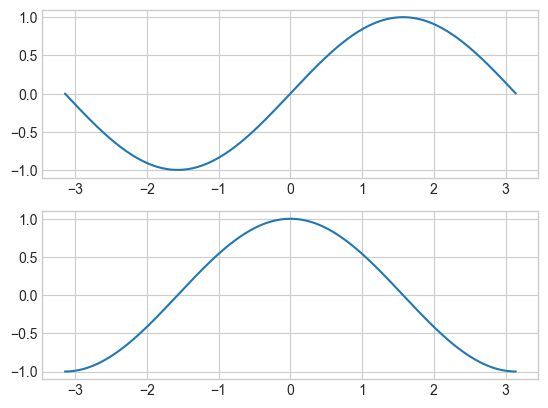

In [4]:
# 1. create a plot figure
plt.figure() 

# 2. create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, S)

# 3. create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, C); 
# Note that the semicolon at the end of the last line is intentional: it suppresses the textual
# representation of the plot from the output

It is important to recognize that this interface is ***stateful***: it keeps track of the "current" figure and axes, which are where all plt commands are applied. You can get a reference to these using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) functions.

<Axes: >

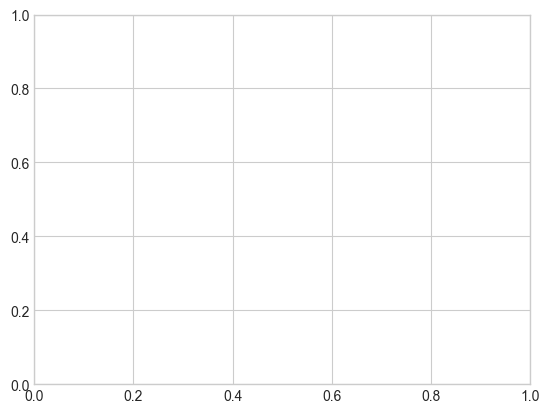

In [5]:
plt.gca()

While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, once the second panel is created, how can we go back and add something to the first? This is possible within the MATLAB-style interface, but a bit clunky. Fortunately, there is a better way.

### Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit `Figure` and `Axes` objects.

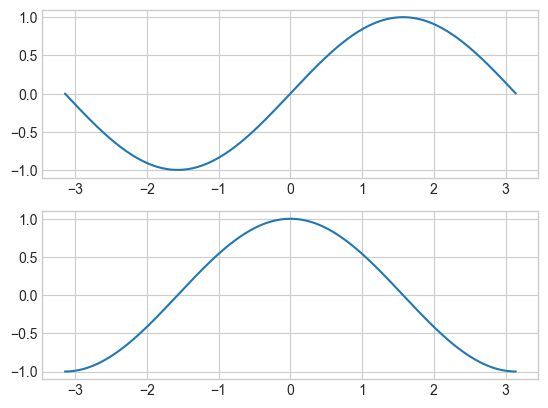

In [6]:
# 1. First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# 2. Call plot() method on the appropriate object
ax[0].plot(x, S)
ax[1].plot(x, C);

For simpler plots, the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more complicated.

## Simple plots

### Simple line plots

Perhaps the simplest of all plots is the visualization of a single function $y=f(x)$.Here we will take a first look at creating a simple plot of this type. We start by creating a figure and axes.

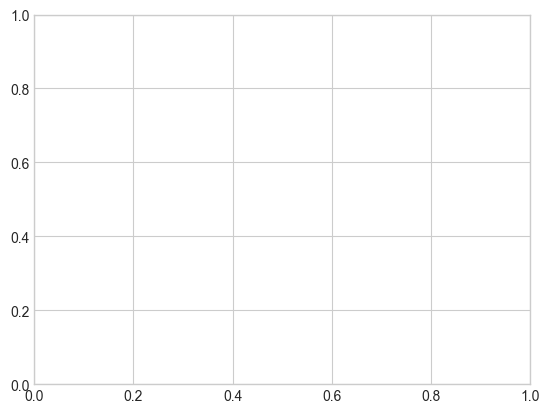

In [7]:
fig = plt.figure()
ax = plt.axes()

In `Matplotlib`, the `figure` (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing `axes`, `graphics`, `text`, and `labels`. The `axes` (an instance of the class `plt.Axes`) is what we see above: a bounding box with ticks, grids, and labels, which will eventually contain the plot elements that make up our visualization.

Once we have created an axes, we can use the `ax.plot()` method to plot some data. Let's start with a simple sinusoid

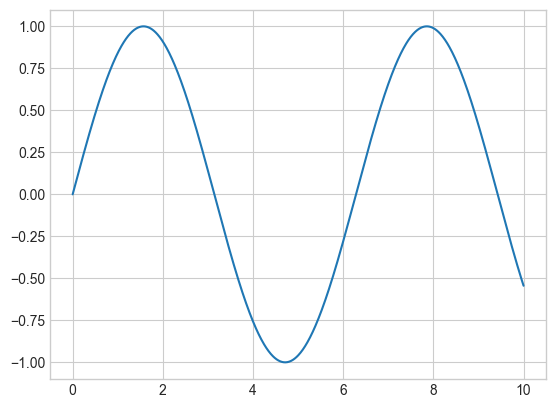

In [8]:
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))
fig # Needed in VS Code
# Alternatively, you can use plt.plot(x, np.sin(x)); and let the figure and axes be created for us in the background

If we want to create a single figure with multiple lines, we can simply call the `plot()` function multiple times:

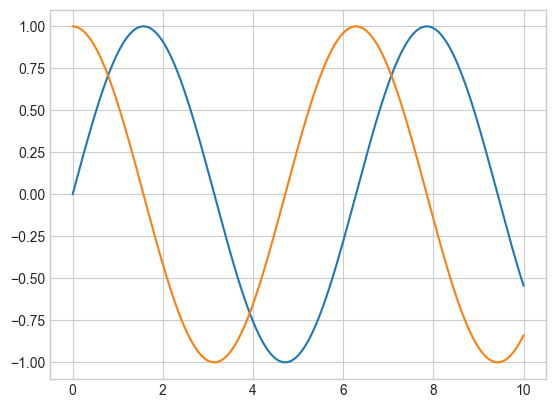

In [9]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

#### Adjusting the Plot: Line Colors, Styles and widths

The first adjustment you might wish to make to a plot is to control the line colors and styles. The `plt.plot()` function takes additional arguments that can be used to specify these. To adjust the color, you can use the `color` keyword, which accepts a string argument representing virtually any imaginable color.

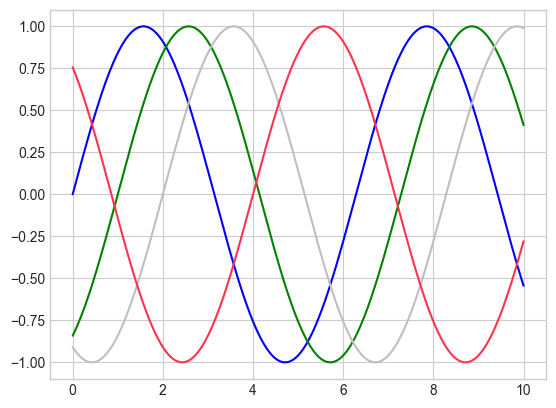

In [10]:
plt.plot(x, np.sin(x - 0), color='blue') # specify color by name
plt.plot(x, np.sin(x - 1), color='g') # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75') # grayscale between 0 and 1
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1

Similarly, the line style can be adjusted using the `linestyle` keyword:

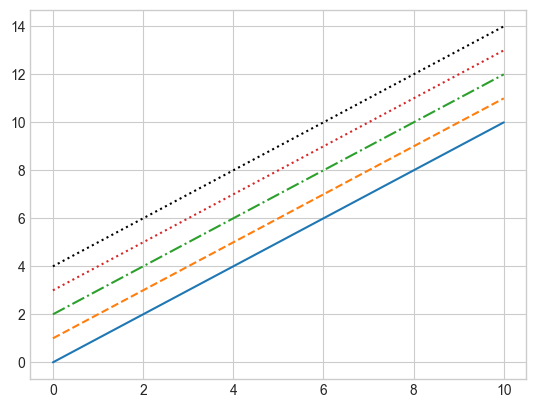

In [13]:
plt.plot(x, x + 0, linestyle='-') # solid
plt.plot(x, x + 1, linestyle='--') # dashed
plt.plot(x, x + 2, linestyle='-.') # dashdot
plt.plot(x, x + 3, linestyle=':') # dotted
plt.plot(x, x + 4, ':k'); # dotted black 
# You can save some keystrokes by combining these linestyle and color codes into a single non-keyword argument

Finally, you can also adjust the width using `linewidth` keyword:

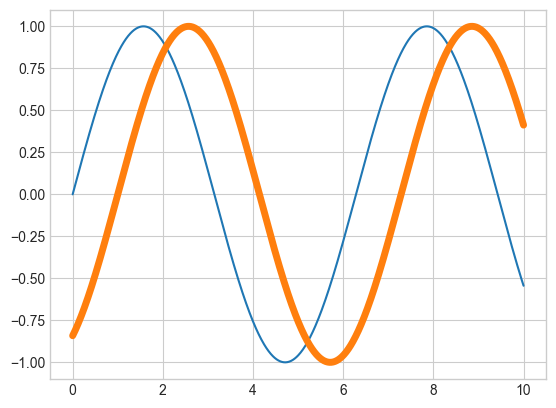

In [15]:
plt.plot(x, np.sin(x - 0)) 
plt.plot(x, np.sin(x - 1), linewidth='5') 

#### Adjusting the Plot: Axes Limits

`Matplotlib` does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust the limits is to use the `plt.xlim()` and `plt.ylim()` functions:

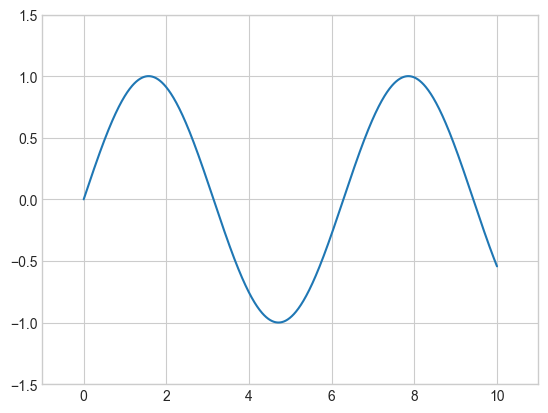

In [14]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

#### Labeling Plots

We'll briefly look at the labeling of plots. Titles and axis labels are the simplest such labels — there are methods that can be used to quickly set them. In addition, Wwen multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. Again, `Matplotlib` has a built-in way of quickly creating such a legend; it is done via the (you guessed it) `plt.legend()` method:

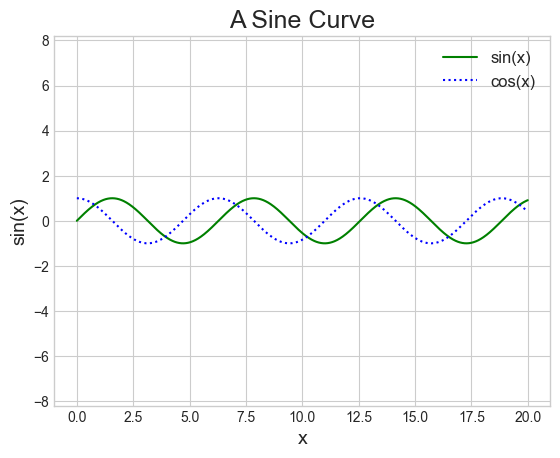

In [15]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.title("A Sine Curve", fontsize=18)
plt.xlabel("x", fontsize=14)
plt.ylabel("sin(x)", fontsize=14)
plt.legend(fontsize=12)

plt.axis('equal');

Note that we also use the function `plt.axis('equal')` to force the scaling to be equal on both axes. In addition, the `plt.legend()` function keeps track of the line style and color, and matches these with the correct label!

For more labels, you can refer to the following figure:

<center><img src="https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/figure/anatomy-of-a-figure.png"></center>
<div align="center"> source: https://matplotlib.org/matplotblog/posts/pyplot-vs-object-oriented-interface/figure/anatomy-of-a-figure.png </div>

#### `Matplotlib` Gotchas

While most `plt` functions translate directly to `ax` methods (`plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. For transitioning between MATLAB-style functions and object-oriented methods, make the following
changes:

|  Functional |      OOP      |
|:-----------:|:-------------:|
| plt.xlabel()  | ax.set_xlabel() |
|  plt.ylabel() | ax.set_ylabel() |
|   plt.xlim()  |  ax.set_xlim()  |
|   plt.ylim()  |  ax.set_ylim()  |
|  plt.title()  |  ax.set_title() |



### Simple Scatter Plots

Another commonly used plot type is the simple scatter plot. Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. It turns out that this same function can produce scatter plots as well:

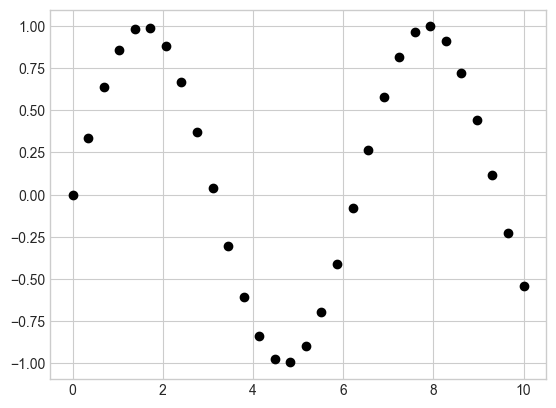

In [20]:
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black');

The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as '-' or '--' to control the line style, the marker style has its own set of short string codes:

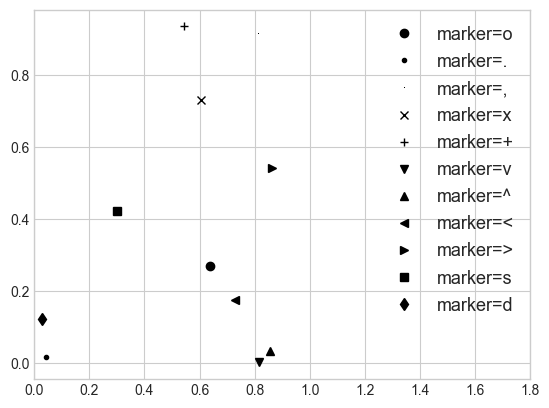

In [26]:
rng = np.random.default_rng(0)

for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.random(1), rng.random(1), marker, color='black', label=f'marker={marker}')

plt.legend(fontsize=13)
plt.xlim(0, 1.8);

For even more possibilities, these character codes can be used together with line and color codes to plot points along with a line connecting them. In addition, you can also set the size or color for the markers:

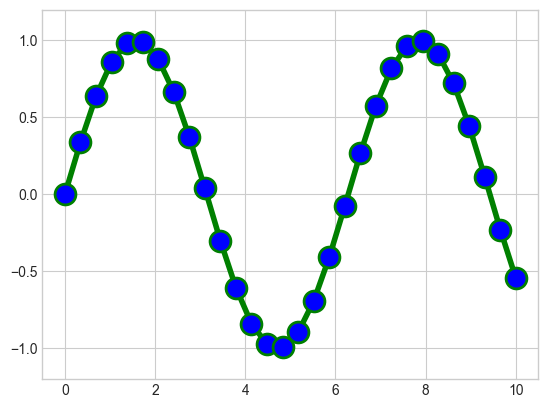

In [29]:
plt.plot(x, y, '-og', markersize=15, linewidth=4, markerfacecolor='blue', markeredgewidth=2)
plt.ylim(-1.2, 1.2);

#### Scatter Plots with `plt.scatter()`

A second, more powerful method of creating scatter plots is the `plt.scatter()` function. The primary difference of `plt.scatter()` from `plt.plot()` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes. In order to better see the overlapping results, we’ll also use the `alpha` keyword to adjust the transparency level:

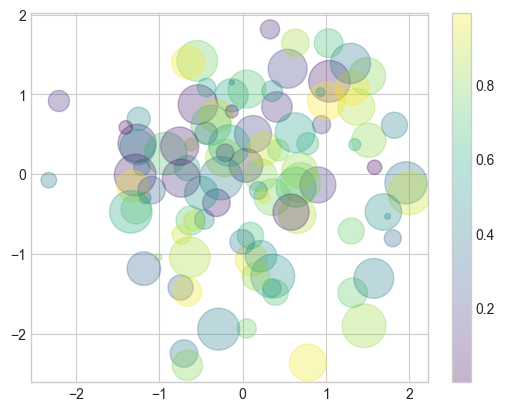

In [30]:
rng = np.random.default_rng(0)

x = rng.normal(size=100)
y = rng.normal(size=100)
colors = rng.random(100)
sizes = 1000 * rng.random(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

Notice that the `color` argument is automatically mapped to a color scale (shown here by the `colorbar()` command). In addition, we can select a color map using the keyword `cmap`. For all `Matplotlib` color maps, see the [list of colormaps](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

### Density and Contour Plots

Sometimes it is useful to display three-dimensional data in two dimensions using contours or color-coded regions. There are three `Matplotlib` functions that can be helpful for this task: `plt.contour()` for contour plots, `plt.contourf()` for filled contour plots, and `plt.imshow()` for showing images. 

#### Visualizing a Three-Dimensional Function

Our first example demonstrates a contour plot using a function $z = f(x, y)$, using the following particular choice for $f$:

In [26]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

A contour plot can be created with the `plt.contour()` function. It takes three arguments: a grid of x values, a grid of y values, and a grid of z values. The x and y values represent positions on the plot, and the z values will be represented by the contour levels. Perhaps the most straightforward way to prepare such data is to use the `np.meshgrid()` function, which builds two-dimensional grids from one-dimensional arrays:

In [27]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y)
X, Y

(array([[0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        ...,
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ],
        [0.        , 0.10204082, 0.20408163, ..., 4.79591837, 4.89795918,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.12820513, 0.12820513, 0.12820513, ..., 0.12820513, 0.12820513,
         0.12820513],
        [0.25641026, 0.25641026, 0.25641026, ..., 0.25641026, 0.25641026,
         0.25641026],
        ...,
        [4.74358974, 4.74358974, 4.74358974, ..., 4.74358974, 4.74358974,
         4.74358974],
        [4.8

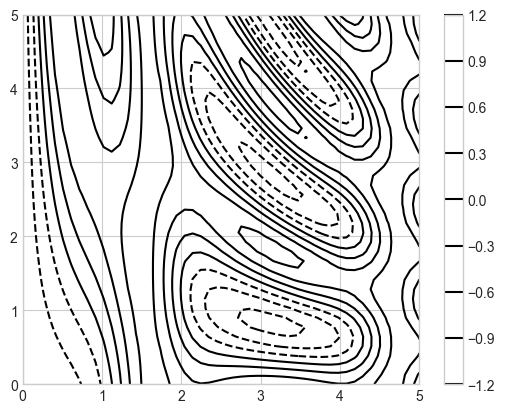

In [28]:
Z = f(X, Y)
plt.contour(X, Y, Z, colors='black')
plt.colorbar();

Notice that when a single color is used, negative values are represented by dashed lines and positive values by solid lines. Our plot is looking nicer, but the spaces between the lines may be a bit distracting. We can change this by switching to a filled contour plot using the `plt.contourf()` function, which uses largely the same syntax as `plt.contour()`:

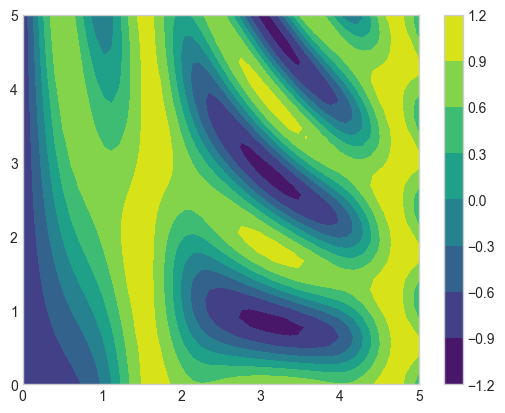

In [29]:
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar();
# The colorbar makes it clear that the which regions are “peaks” or “valleys.”

One potential issue with this plot is that it is a bit splotchy: the color steps are discrete rather than continuous, which is not always what is desired. A way to generate a smooth representation is to use the `plt.imshow()` function,
which offers the `interpolation` argument to generate a smooth two-dimensional representation of the data:

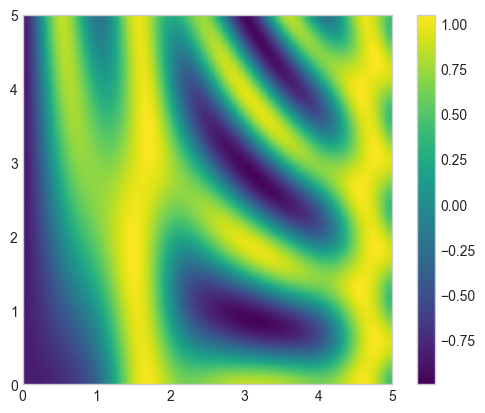

In [31]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower', cmap='viridis', interpolation='gaussian', aspect='equal')
plt.grid(False)
plt.colorbar();

There are a few potential gotchas with `plt.imshow()`:

- It doesn't accept an x and y grid, so you must manually specify the extent `[xmin, xmax, ymin, ymax]` of the image on the plot.
- By default it follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- It will automatically adjust the axis aspect ratio to match the input data; this can be changed with the `aspect` argument.
- We turn off the grid explicitly with `plt.grid(False)`.

#### Histograms, Binnings, and Density

A simple histogram can be a great first step in understanding a dataset, we can use plt.hist() to compute and draw a histogram of sample data:

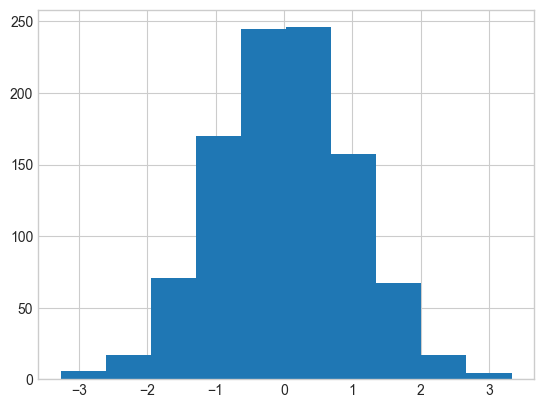

In [42]:
rng = np.random.default_rng(1701)
data = rng.normal(size=1000)
plt.hist(data);

The `hist()` function has many options to tune both the calculation and the display; here’s an example of a more customized histogram:

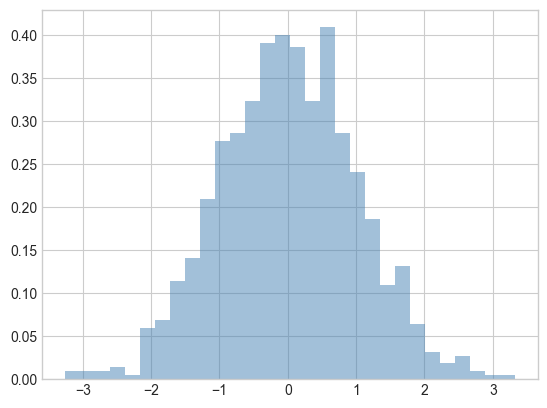

In [43]:
plt.hist(data, bins=30, density=True, alpha=0.5, color='steelblue', edgecolor='none');

The `density=True` keyword argument normalizes the histogram and plots it on same axes as the data. The `bins` keyword argument specifies the number of bins to use for the histogram.

## Advance plot

### Filling the area between lines

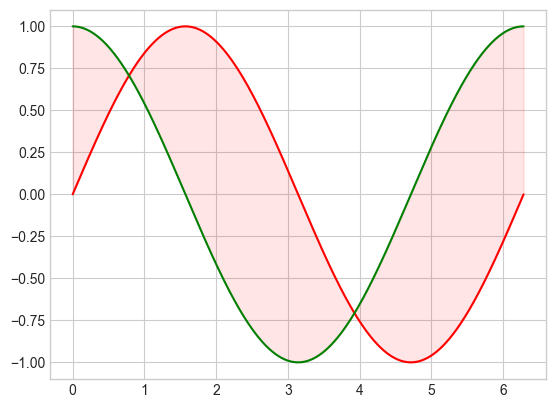

In [35]:
x = np.linspace(0, 2*np.pi, 1000)

plt.plot(x, np.sin(x), 'r')
plt.plot(x, np.cos(x), 'g')
plt.fill_between(x, np.cos(x), np.sin(x), color='red', alpha=0.1)

### Plot in polar coordinate

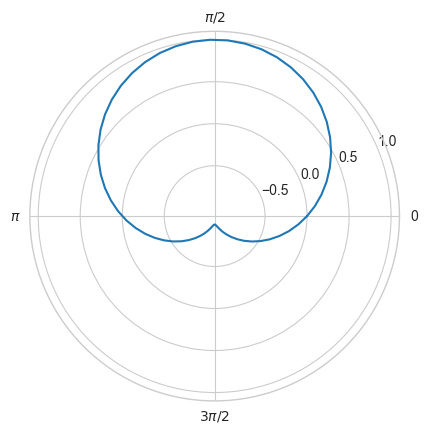

In [42]:
t = np.linspace(0, 2*np.pi, 64)

# plot in polar coordinates
plt.axes(projection='polar')
plt.plot(t, np.sin(t), '-');

# Set ticks for polar coordinate
plt.xticks([0, np.pi/2, np.pi, 3*np.pi/2], ['0', '$\pi/2$', '$\pi$', '$3\pi/2$'])
plt.yticks([-0.5,0,0.5,1]);

## Customizing Plot

### Customizing Plot Legends

Plot legends give meaning to a visualization, assigning meaning to the various plot elements. For example, we
can specify the location and turn on the frame:

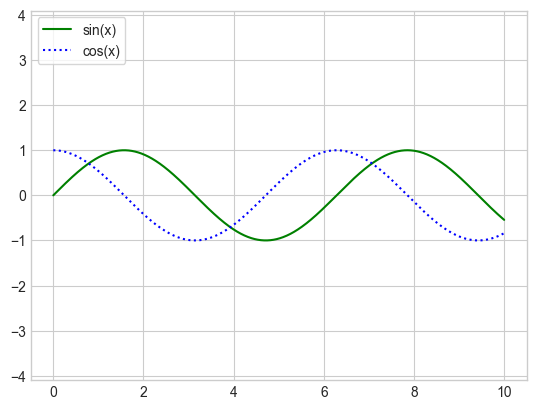

In [46]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')

plt.legend(loc='upper left', frameon=True);

#### Text and Annotation

Creating a good visualization involves guiding the reader so that the figure tells a story. In some cases, this story can be told in an entirely visual manner, without the need for added text, but in others, small textual cues and labels are necessary. Perhaps the most basic types of annotations you will use are axes labels and titles, but the options go beyond this.

When we're visualizing data like this, it is often useful to annotate certain features of the plot to draw the reader's attention. This can be done manually with the `plt.text()` functions, which will place text at a particular x/y value. In addition, we can use the `plt.annotate()` function, which creates some text and an arrow and allows the arrows to be very flexibly specified.

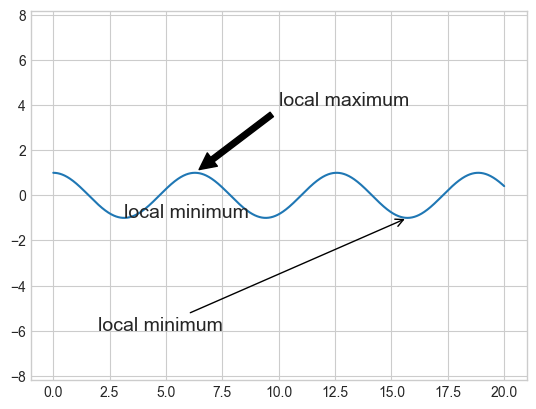

In [13]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.axis('equal')

plt.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=14)
plt.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6), arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.text(3.14, -1, 'local minimum', fontsize=14); # (x, y, text)

The arrow style is controlled through the `arrowprops` dictionary, which has numerous options available.

#### Customizing Ticks and Splines

`Matplotlib`'s default tick locators and formatters are designed to be generally sufficient in many common situations, but are in no way optimal for every plot. Within each axes, there is the concept of a major tickmark, and a minor tickmark. As the names imply, major ticks are usually bigger or more pronounced, while minor ticks are usually smaller. You can change the ticks using `xticks()` and `yticks()` functions. The first argument is a list of tick locations, and the second argument is a list of tick labels:

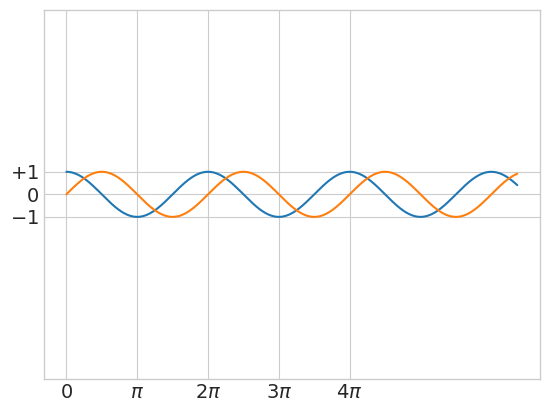

In [11]:
x = np.linspace(0, 20, 1000)
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))
plt.axis('equal')

# Set the ticks and tick labels
plt.xticks([0, np.pi, 2 * np.pi, 3 * np.pi, 4 * np.pi],
              [r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'], fontsize=14)
plt.yticks([-1, 0, +1],  [r'$-1$', r'$0$', r'$+1$'], fontsize=14);

*Spines* are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions and until now, they were on the border of the axis. We'll change that since we want to have them in the middle. Since there are four of them (top/bottom/left/right), we'll discard the top and right and we move the bottom and left ones to the center:

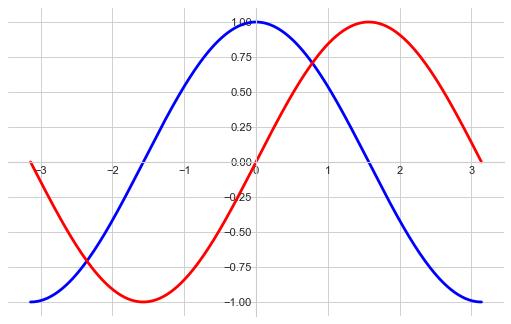

In [32]:
plt.figure(figsize=(8,5), dpi=80)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C = np.cos(X)
S = np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")

ax = plt.gca()
ax.spines[['top', 'right']].set_visible(False)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))

Note that here we also use `plt.figure(figsize=(8,5), dpi=80)` to set the figure size and resolution.

## Multiple Subplots

Sometimes it is helpful to compare different views of data side by side. To this end, `Matplotlib` has the concept of subplots: groups of smaller axes that can exist together within a single figure. These subplots might be insets, grids of plots, or other more complicated layouts.

### `plt.subplots()`: The Whole Grid in One Go

Aligned columns or rows of subplots are a common enough need that `Matplotlib` has several convenience routines that make them easy to create. `plt.subplots()` is the easier tool to use (note the s at the end of subplots). Rather than creating a single subplot, **this function creates a full grid of subplots in a single line, returning them in a `NumPy` array**. The arguments are the number of rows and number of columns, along with optional keywords `sharex` and
`sharey`, which allow you to specify the relationships between different axes.

Let’s create a $2 \times 3$ grid of subplots, and adjust the spacing between them:

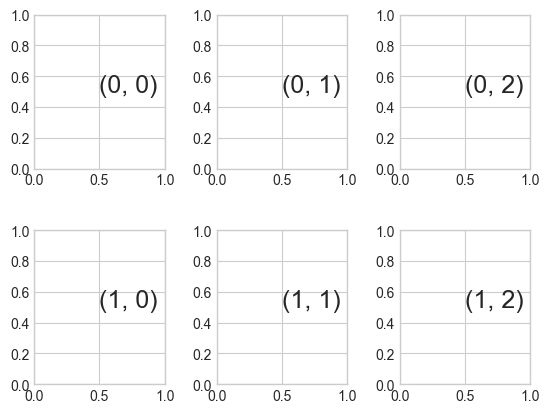

In [17]:
fig, ax = plt.subplots(2, 3)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18)

The command `plt.subplots_adjust()` can be used to adjust the spacing between these plots (in this case, the space is 40% of the subplot width and height).

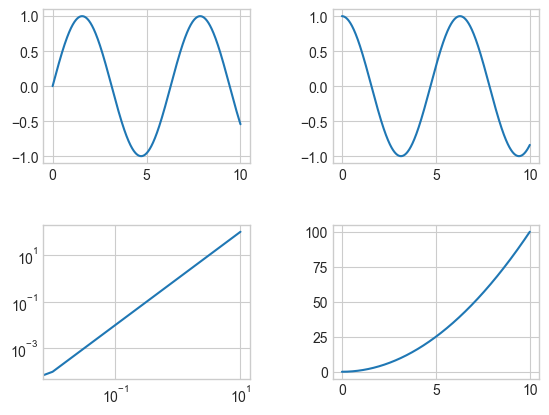

In [43]:
fig, ax = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.4, wspace=0.4)

x = np.linspace(0, 10, 1000)
ax[0,0].plot(x, np.sin(x))
ax[0,1].plot(x, np.cos(x))
ax[1,0].plot(x, x**2)
ax[1,0].set_xscale('log')
ax[1,0].set_yscale('log')
ax[1,1].plot(x, x**2);

[https://scipy-lectures.org/intro/matplotlib/index.html](https://scipy-lectures.org/intro/matplotlib/index.html).

[https://realpython.com/python-matplotlib-guide/](https://realpython.com/python-matplotlib-guide/)

[https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/)